# EfficientNetB0 Pest Classifier

In [2]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
class_names = ['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']

In [5]:
model = models.efficientnet_b0(pretrained=False)
model.classifier[1] = torch.nn.Linear(model.classifier[1].in_features, len(class_names))
model.load_state_dict(torch.load("C:/Users/chaha/Desktop/PestDetection_Project/efficientnetb0_pest_classifier_1.pth", map_location=device))
model.to(device)
model.eval()
print("Model loaded successfully.")

Model loaded successfully.


In [6]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [7]:
def predict_image(image_path):
    image = Image.open(image_path).convert('RGB')
    input_tensor = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        output = model(input_tensor)
        _, pred = torch.max(output, 1)
        predicted_class = class_names[pred.item()]

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()

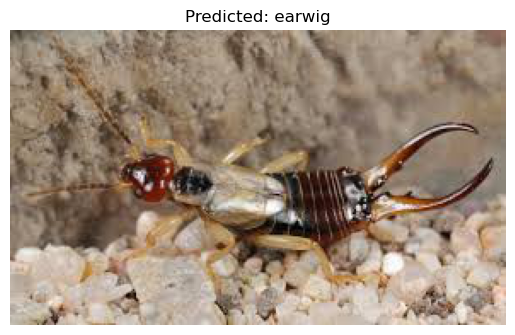

In [8]:
predict_image("C:/Users/chaha/Downloads/images.jpeg")